<a href="https://colab.research.google.com/github/ahdi27/Machine-Learning/blob/main/Python/CNN_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M. Amridhan Mahdi 18/429290/PA/18681**



In [4]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


**Load Data**

In [5]:
!kaggle datasets download alxmamaev/flowers-recognition

 96% 434M/450M [00:06<00:00, 42.1MB/s]
100% 450M/450M [00:06<00:00, 68.5MB/s]


In [6]:
import os
import zipfile

local_zip = "flowers-recognition.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

**Data Visualization**

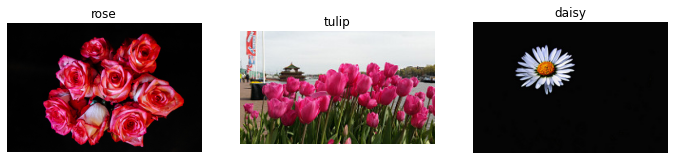

In [39]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

path = "/tmp/flowers"
flower_paths = [os.path.join(path,fn) for fn in os.listdir(path) if fn=='daisy' or fn=='tulip' or fn=='rose']
sample_files = [fn+"/"+random.choice(os.listdir(fn)) for fn in flower_paths]
sample_paths = [os.path.join(path, sf) for sf in sample_files]

fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_path in enumerate(sample_paths):
  plt.subplot(4,4,i+1)
  plt.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(re.search(r"flowers/(\w*)",img_path)[1])
plt.show()

**Data Preparation**

In [ ]:
#creating directories
!mkdir '/tmp/flower'
!mkdir '/tmp/flower/training'
!mkdir '/tmp/flower/testing'
!mkdir '/tmp/flower/training/rose'
!mkdir '/tmp/flower/training/tulip'
!mkdir '/tmp/flower/training/daisy'
!mkdir '/tmp/flower/testing/rose'
!mkdir '/tmp/flower/testing/tulip'
!mkdir '/tmp/flower/testing/daisy'

In [57]:
#declare variables of directories
dir='/tmp/flower'
train_dir='/tmp/flower/training'
test_dir='/tmp/flower/testing'
train_flower_dir=[os.path.join(train_dir, fn) for fn in os.listdir(train_dir)]
test_flower_dir=[os.path.join(test_dir, fn) for fn in os.listdir(test_dir)]
train_flower_dir,test_flower_dir

(['/tmp/flower/training/rose',
  '/tmp/flower/training/tulip',
  '/tmp/flower/training/daisy'],
 ['/tmp/flower/testing/rose',
  '/tmp/flower/testing/tulip',
  '/tmp/flower/testing/daisy'])

**Split the Data**

In [67]:
import random
import os
from shutil import copyfile
#data splitting function
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    n_files = 100
    for file_name in os.listdir(SOURCE):
        file_path = os.path.join(SOURCE, file_name)

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    split_point = int(n_files * SPLIT_SIZE)
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(TRAINING, file_name))
        
    for file_name in test_set:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(TESTING, file_name))

for i in range(len(train_flower_dir)):
  split_data(flower_paths[i],train_flower_dir[i],test_flower_dir[i],0.8)

**Image Augmentation**

In [266]:
from keras.preprocessing.image import ImageDataGenerator

img_size=(240,320)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest")

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(train_dir, batch_size=20,class_mode='categorical',target_size=img_size)
valid_gen = valid_datagen.flow_from_directory(test_dir, batch_size=5, class_mode='categorical',target_size=img_size)
test_gen = test_datagen.flow_from_directory(test_dir,class_mode='categorical',target_size=img_size)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


**Define the Model**

In [80]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.optimizers import Adam

#create Model function
def setModel():
  model = Sequential([
      Conv2D(64, (3,3), activation='relu', input_shape=img_size+(3,)),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dropout(0.5),
      Dense(512, activation='relu'),
      Dense(3, activation='softmax')
  ])
  #display the summary of the layers
  model.summary()
  return model

#compile Model function
def compileModel(model,lr):
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
  return model

In [84]:
#create the Model
model=setModel()
#compile the Model
#learning rate = 0.1
model1=compileModel(model,lr=0.1)
#learning rate = 0.8
model2=compileModel(model,lr=0.8)
#best learning_rate = 0.0001
best_model=compileModel(model,lr=1e-4)
epochs=50

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 238, 318, 16)      448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 119, 159, 16)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 117, 157, 16)      2320      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 58, 78, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 56, 76, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 28, 38, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 26, 36, 32)       

**Model Training**

In [82]:
history1 = model1.fit(train_gen, epochs=epochs, validation_data = valid_gen)
#verbose=0 training without displaying the epochs
history2 = model2.fit(train_gen, epochs=epochs, validation_data = valid_gen, verbose = 0)
best_history = best_model.fit(train_gen, epochs=epochs, validation_data = valid_gen, verbose=0)

Epoch 1/50
12/12 [==============================] - 13s 1000ms/step - loss: 86299560.0000 - accuracy: 0.2833 - val_loss: 2.5613 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 12s 984ms/step - loss: 1.3710 - accuracy: 0.2958 - val_loss: 1.1187 - val_accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 12s 985ms/step - loss: 1.1105 - accuracy: 0.3542 - val_loss: 1.1019 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 12s 982ms/step - loss: 1.1046 - accuracy: 0.3042 - val_loss: 1.1049 - val_accuracy: 0.3333
Epoch 5/50
12/12 [==============================] - 12s 983ms/step - loss: 1.1132 - accuracy: 0.3208 - val_loss: 1.1224 - val_accuracy: 0.3333
Epoch 6/50
12/12 [==============================] - 12s 985ms/step - loss: 1.1244 - accuracy: 0.3250 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 7/50
12/12 [==============================] - 12s 986ms/step - loss: 1.1582 - accuracy: 0.3167 - val_loss: 1.1937 - val_accuracy

**Accuracy and Loss Visualization Function**

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  sns.set_style('whitegrid')
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Training and validation accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training accuracy', 'Validation accuracy'])
  plt.show()

  sns.set_style('whitegrid')
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Training and validation loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training loss', 'Validation loss'])
  plt.show()

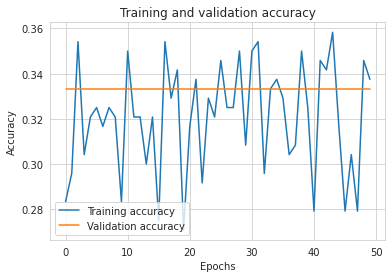

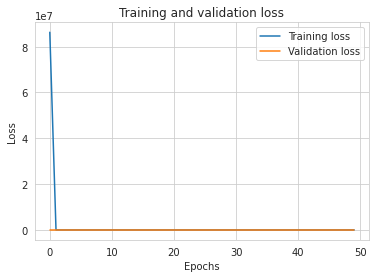

In [100]:
#@title **Model 1 Visualization with learning rate = 0.1**
visualize(history1)

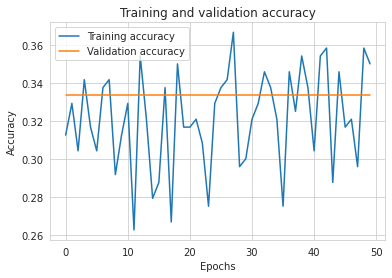

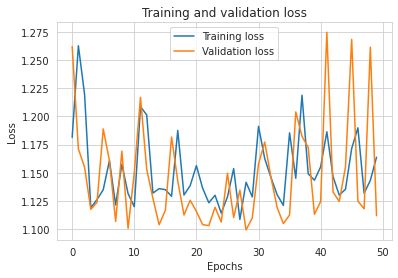

In [101]:
#@title **Model 2 Visualization with learning rate = 0.8**
visualize(history2)

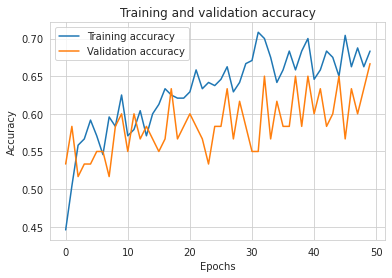

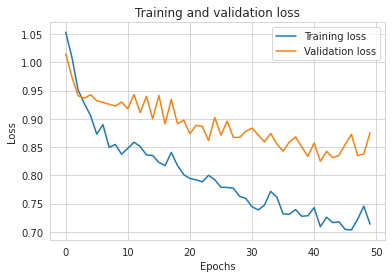

In [103]:
#@title **Best Model Visualization with learning rate=0.0001**
visualize(best_history)

**Get the accuracy of predicting the train images**

In [268]:
evaluation1 = model1.evaluate(train_gen)
evaluation2 = model2.evaluate(train_gen)
best_evaluation=best_model.evaluate(train_gen)

12/12 [==============================] - 6s 470ms/step - loss: 0.6822 - accuracy: 0.7250


In [109]:
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import load_img, img_to_array

def process(image):
  image = load_img(image, target_size=img_size)
  img = img_to_array(image)
  img = np.expand_dims(img, axis=0)
  img = np.vstack([img])
  return img, image

def classify(classes):
  if classes[0][0]==1:
    return "Daisy"
  elif classes[0][1]==1:
    return "Rose"
  elif classes[0][2]==1:
    return "Tulip"
  return "None"

def visualize(image):
  plt.imshow(image)
  plt.axis('off')
  plt.show()

**Get the accuracy of predicting the test images by Manual**

In [264]:
test_images=[os.path.join(test_dir,fn) for fn in valid_gen.filenames]
test_labels=valid_gen.labels
(test_images[28],test_labels[28]), (test_images[1],test_labels[1])

(('/tmp/flower/testing/rose/4279989256_9a48c0d194_n.jpg', 1),
 ('/tmp/flower/testing/daisy/17249393016_093e915012_n.jpg', 0))

In [258]:
predictions=[]
#Predict
for fn in test_images: 
  img, image = process(fn)
  predictions.append(best_model.predict(img))

truelabels=test_labels
predictions=np.array([prediction.reshape(3,) for prediction in predictions])
predicts=[]
for i in range(len(predictions)):
  if predictions[i][0]==1:
    predicts.append(0)
  elif predictions[i][1]==1:
    predicts.append(1)
  elif predictions[i][2]==1:
    predicts.append(2)
  else:
    predicts.append(-1)
predictions=np.array(predicts).astype('int')
predictions, truelabels

(array([ 2,  0,  0,  2,  0,  2,  0,  0,  1,  0,  0,  0,  2,  0,  2,  0,  0,
         0,  0,  0, -1,  1,  2,  1, -1,  2,  0,  2,  2,  0,  0,  2,  0,  2,
         2,  1, -1,  1,  2, -1,  2,  1,  2,  2,  1,  2,  2,  2,  0,  2,  2,
         2,  2,  2,  2,  2,  2,  1,  2,  2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32))

In [254]:
predicted=0
for i in range(len(predictions)):
  if predictions[i]==truelabels[i]:
    predicted=predicted+1

print("Accuracy:",predicted/len(truelabels))

Accuracy: 0.5666666666666667


**Predict The Image by Uploading**

Saving download (1).jpg to download (1) (1).jpg
Saving Oxeye-daisy-flower_3859338724_o.jpg to Oxeye-daisy-flower_3859338724_o (1).jpg
Saving tulipa-tulip-festival.jpg to tulipa-tulip-festival (1).jpg


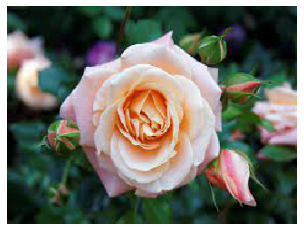

download (1).jpg is Rose


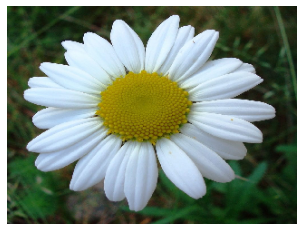

Oxeye-daisy-flower_3859338724_o.jpg is Daisy


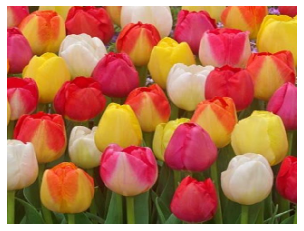

tulipa-tulip-festival.jpg is Tulip


In [173]:
from google.colab import files

uploaded = files.upload()
for file in uploaded.keys():
  img, image = process(file)
  classes = best_model.predict(img)
  visualize(image)
  print(file+" is "+classify(classes))